In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Pre-processing e data visualizzation

In [ ]:
import pandas as pd

df = pd.read_csv('Dataset\sentimentdataset.csv')
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_19644\3684397437.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Dataset\sentimentdataset.csv')


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
#df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df.head()

# Reimposta l'indice come quello predefinito (0, 1, 2, ...)
df.reset_index(drop=True, inplace=True)

# Rimuove gli spazi extra dalle colonne del dataframe
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df.to_csv('Dataset/new_dataset.csv', index_label="ID")

C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_19644\437212820.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [6]:
#df_new = pd.read_csv('Dataset/new_dataset.csv')
df_new = pd.read_csv('/content/drive/MyDrive/Data science/NLP/Dataset/new_dataset.csv')
df_new.head()

,ID,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


##### Distribuzione dei sentimenti

C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_19644\2032279912.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x="Sentiment", palette="viridis", order=top_40_sentiments)


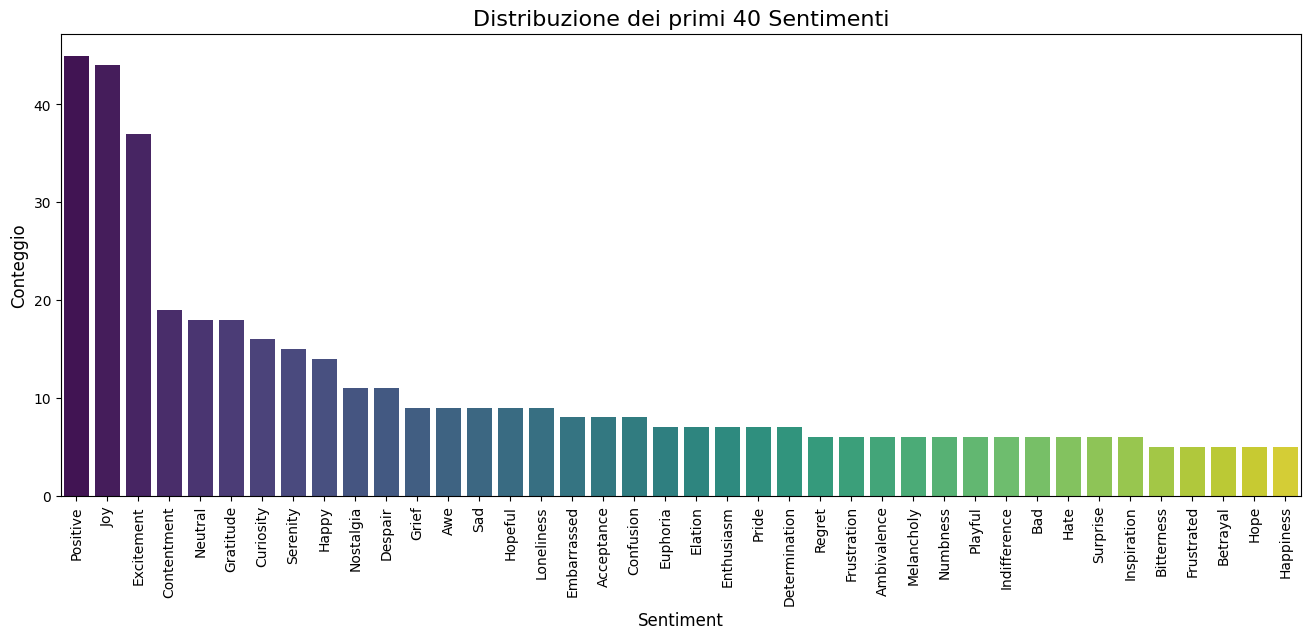

['Positive' 'Negative' 'Neutral' 'Anger' 'Fear' 'Sadness' 'Disgust'
 'Happiness' 'Joy' 'Love' 'Amusement' 'Enjoyment' 'Admiration' 'Affection'
 'Awe' 'Disappointed' 'Surprise' 'Acceptance' 'Adoration' 'Anticipation'
 'Bitter' 'Calmness' 'Confusion' 'Excitement' 'Kind' 'Pride' 'Shame'
 'Elation' 'Euphoria' 'Contentment' 'Serenity' 'Gratitude' 'Hope'
 'Empowerment' 'Compassion' 'Tenderness' 'Arousal' 'Enthusiasm'
 'Fulfillment' 'Reverence' 'Despair' 'Grief' 'Loneliness' 'Jealousy'
 'Resentment' 'Frustration' 'Boredom' 'Anxiety' 'Intimidation'
 'Helplessness' 'Envy' 'Regret' 'Curiosity' 'Indifference' 'Numbness'
 'Melancholy' 'Nostalgia' 'Ambivalence' 'Determination' 'Zest' 'Hopeful'
 'Proud' 'Grateful' 'Empathetic' 'Compassionate' 'Playful' 'Free-spirited'
 'Inspired' 'Confident' 'Bitterness' 'Yearning' 'Fearful' 'Apprehensive'
 'Overwhelmed' 'Jealous' 'Devastated' 'Frustrated' 'Envious' 'Dismissive'
 'Thrill' 'Bittersweet' 'Overjoyed' 'Inspiration' 'Motivation'
 'Contemplation' 'JoyfulR

In [ ]:
# Seleziona i primi 40 sentimenti in base alla loro frequenza
top_40_sentiments = df_new['Sentiment'].value_counts().head(40).index

# Filtra il dataset per includere solo i sentimenti selezionati
filtered_df = df_new[df_new['Sentiment'].isin(top_40_sentiments)]

# Grafico
plt.figure(figsize=(16, 6))
sns.countplot(data=filtered_df, x="Sentiment", palette="viridis", order=top_40_sentiments)
plt.title("Distribuzione dei primi 40 Sentimenti", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Conteggio", fontsize=12)
plt.xticks(rotation=90)
plt.show()

print(df_new['Sentiment'].unique())

##### Analisi delle piattaforme

C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_19644\485881396.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new, x="Platform", palette="Set2", order=df['Platform'].value_counts().index)


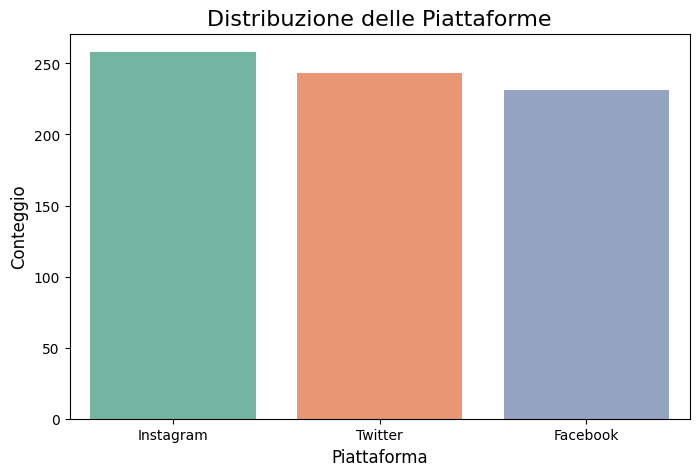

['Twitter' 'Instagram' 'Facebook']


In [ ]:
# Conteggio delle piattaforme
plt.figure(figsize=(8, 5))
sns.countplot(data=df_new, x="Platform", palette="Set2", order=df['Platform'].value_counts().index)
plt.title("Distribuzione delle Piattaforme", fontsize=16)
plt.xlabel("Piattaforma", fontsize=12)
plt.ylabel("Conteggio", fontsize=12)
plt.show()

print(df_new['Platform'].unique())

##### Numero di post per ora

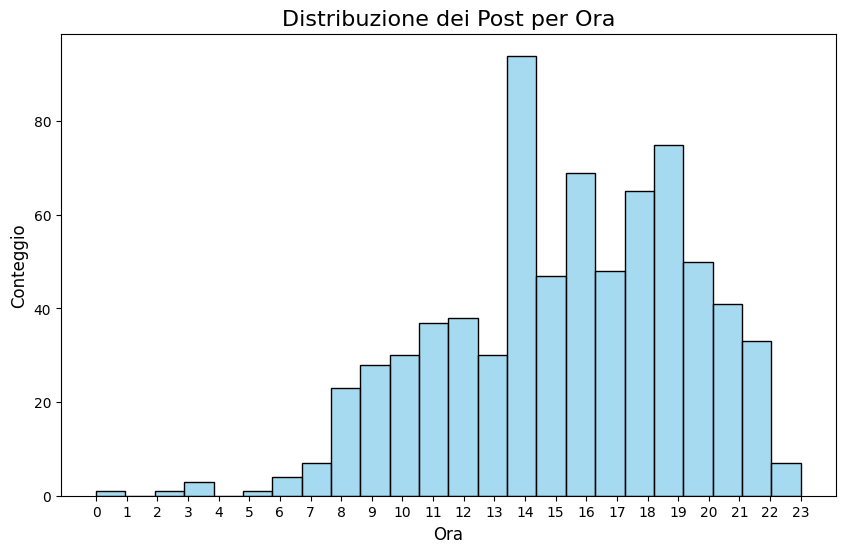

In [ ]:
# Post per ora
plt.figure(figsize=(10, 6))
sns.histplot(df_new['Hour'], bins=24, kde=False, color="skyblue")
plt.title("Distribuzione dei Post per Ora", fontsize=16)
plt.xlabel("Ora", fontsize=12)
plt.ylabel("Conteggio", fontsize=12)
plt.xticks(range(0, 24))
plt.show()

##### Interazioni per paese

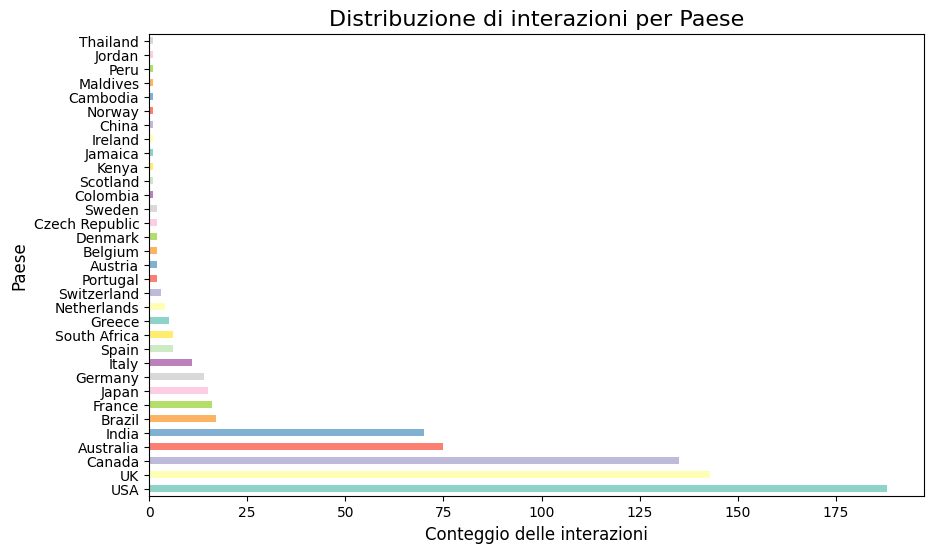

In [ ]:
# Conta il numero di commenti per ogni paese
country_counts = df_new['Country'].value_counts()

# Crea il grafico a colonne orizzontale
plt.figure(figsize=(10, 6))
country_counts.plot(kind='barh', color=sns.color_palette("Set3", len(country_counts)))
plt.title("Distribuzione di interazioni per Paese", fontsize=16)
plt.xlabel("Conteggio delle interazioni", fontsize=12)
plt.ylabel("Paese", fontsize=12)
plt.show()

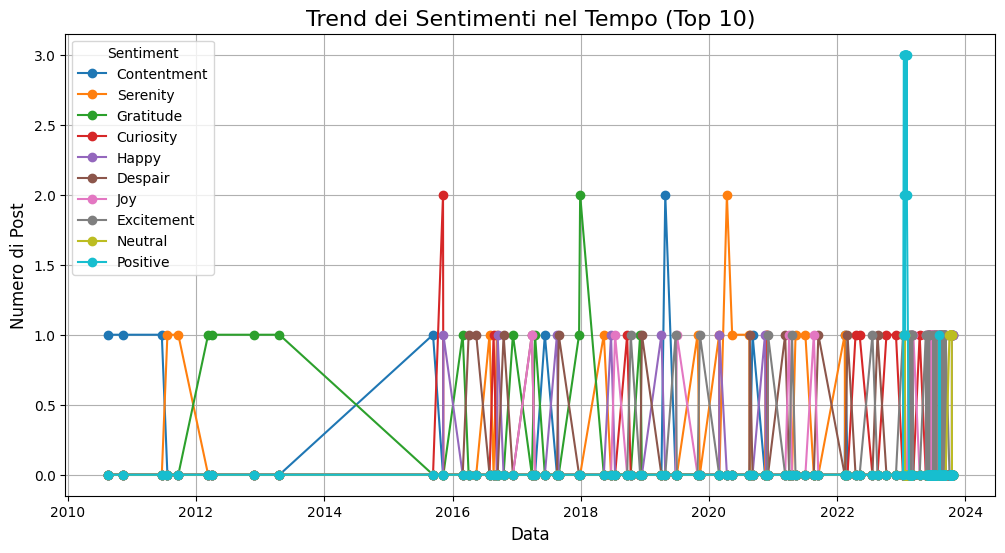

In [ ]:
# Estrae giorno e raggruppa per sentiment
df_new['Date'] = pd.to_datetime(df_new['Timestamp']).dt.date

# Conta i sentimenti totali per ogni data
sentiment_counts = df_new.groupby(['Date', 'Sentiment']).size()

# Seleziona i primi 100 sentimenti per ogni giorno
top_10_sentiments = sentiment_counts.groupby('Sentiment').sum().nlargest(10).index

# Filtra il dataframe per tenere solo i sentimenti nei primi 10
sentiment_trend_filtered = sentiment_counts[sentiment_counts.index.get_level_values('Sentiment').isin(top_10_sentiments)]

# Riorganizza i dati per sentimenti e giorni
sentiment_trend = sentiment_trend_filtered.unstack(fill_value=0)

# Plot trend
sentiment_trend.plot(figsize=(12, 6), marker='o')
plt.title("Trend dei Sentimenti nel Tempo (Top 10)", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Numero di Post", fontsize=12)
plt.legend(title="Sentiment")
plt.grid()
plt.show()

#### WordCloud degli Hashtags e dei commenti

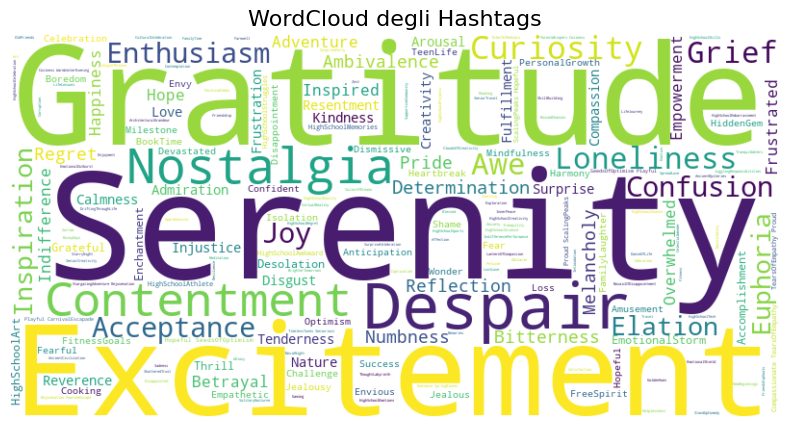

In [ ]:
# Unione di tutti gli hashtag
all_hashtags = " ".join(df_new['Hashtags'].dropna())

# Genera la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_hashtags)

# Visualizza
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud degli Hashtags", fontsize=16)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


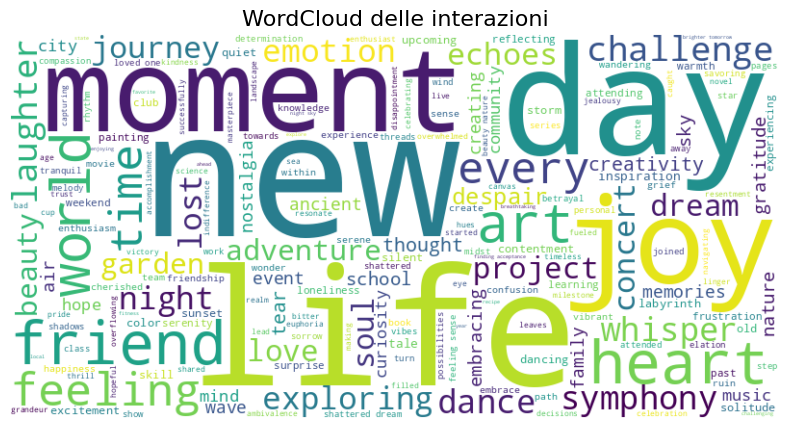

<ipython-input-10-8dacf5fd44f4>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_data['cleaned_text'] = platform_data['Text'].apply(lambda x: preprocess_text(str(x)))


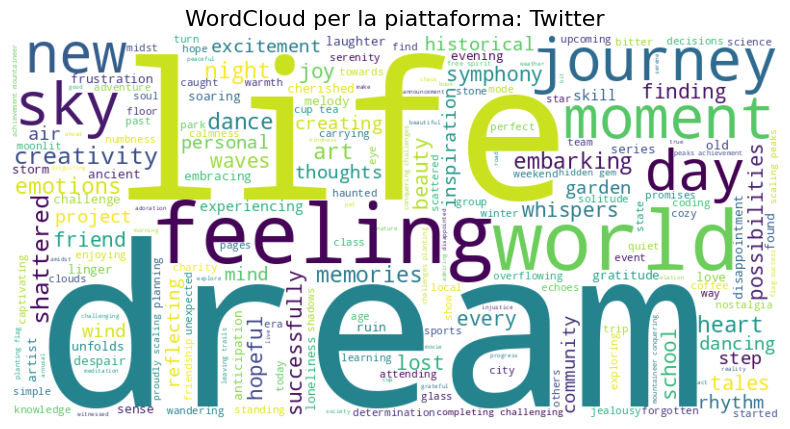

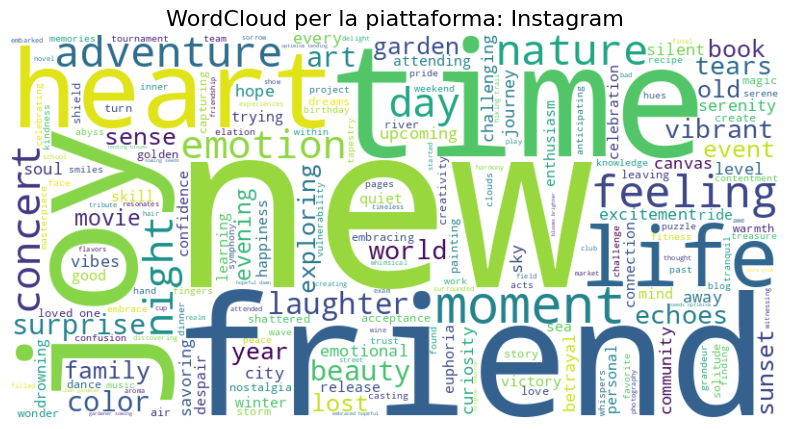

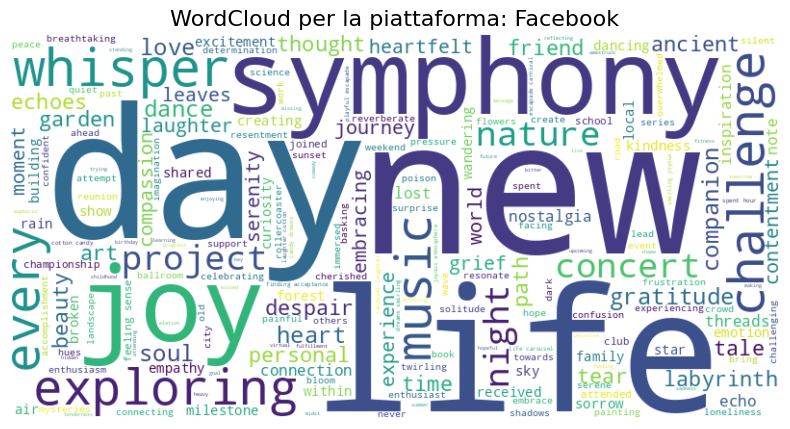

In [10]:
import re
import string
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Funzione per rimuovere emoji e caratteri non alfabetici
def remove_emoji(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

# Funzione di pre-processing del testo
def preprocess_text(text):
    # Rimuove emoji
    text = remove_emoji(text)

    # Converione in minuscolo
    text = text.lower()

    # Rimuove numeri e punteggiatura
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenizzazione
    tokens = word_tokenize(text)

    # Rimuove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return " ".join(tokens)

# Applica il pre-processing su ogni commento
df_new['cleaned_text'] = df_new['Text'].apply(lambda x: preprocess_text(str(x)))

# Unione di tutti i testi puliti
all_text = " ".join(df_new['cleaned_text'].dropna())

# Genera la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

# Visualizza
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud delle interazioni", fontsize=16)
plt.show()

# Raggruppa i dati per piattaforma e applica il pre-processing per ogni piattaforma
platforms = df_new['Platform'].unique()

# Crea un grafico separato per ogni piattaforma
for platform in platforms:
    # Filtra i dati per la piattaforma specifica
    platform_data = df_new[df_new['Platform'] == platform]

    # Applica il pre-processing al testo di quella piattaforma
    platform_data['cleaned_text'] = platform_data['Text'].apply(lambda x: preprocess_text(str(x)))

    # Unisce tutti i testi puliti per la piattaforma
    all_text = " ".join(platform_data['cleaned_text'].dropna())

    # Genera la WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

    # Visualizza la WordCloud per quella piattaforma
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud per la piattaforma: {platform}", fontsize=16)
    plt.show()

#### Sentiment-Analysis

Sentiment_Predicted_TextBlob
Neutral     332
Positive    281
Negative    119
Name: count, dtype: int64


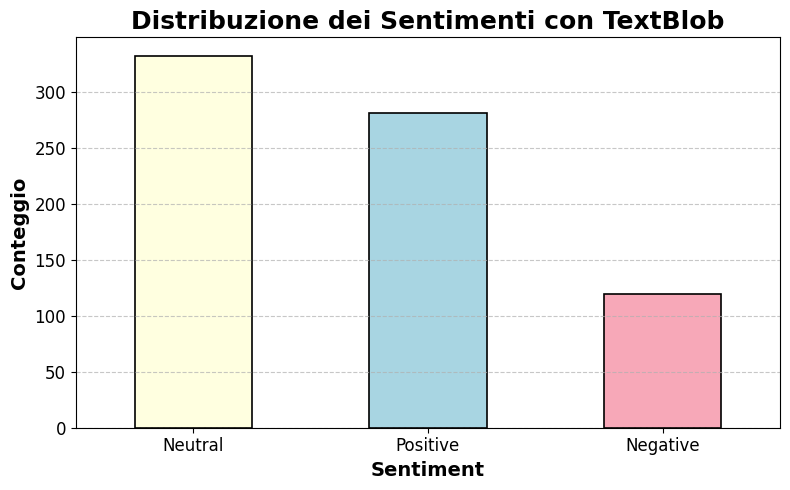

' plt.figure(figsize=(10, 6))\nsns.boxplot(data=df_new, x=\'Sentiment_Predicted_TextBlob\', y=\'Subjectivity\', palette=\'Set2\', linewidth=1.5)\nplt.title("Distribuzione della Soggettività per Sentimento Predetto", fontsize=18, fontweight=\'bold\')\nplt.xlabel("Sentiment Predetto", fontsize=14, fontweight=\'bold\')\nplt.ylabel("Soggettività", fontsize=14, fontweight=\'bold\')\nplt.xticks(fontsize=12)\nplt.yticks(fontsize=12)\nplt.grid(True, linestyle=\'--\', alpha=0.7)\nplt.tight_layout()\nplt.show() '

In [ ]:
from textblob import TextBlob

# Funzione per ottenere sia il sentiment che la soggettività con TextBlob
def get_sentiment_and_subjectivity(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, subjectivity

# Applica la funzione di sentiment analysis e soggettività con TextBlob
df_new[['Sentiment_Predicted_TextBlob', 'Subjectivity']] = df_new['cleaned_text'].apply(lambda x: pd.Series(get_sentiment_and_subjectivity(x)))

# Visualizza i primi risultati
df_new[['Text', 'Sentiment_Predicted_TextBlob', 'Subjectivity']].head()

# Visualizza la distribuzione dei sentimenti predetti da TextBlob
plt.figure(figsize=(8, 5))
sentiment_counts = df_new['Sentiment_Predicted_TextBlob'].value_counts()
print(df_new['Sentiment_Predicted_TextBlob'].value_counts())
bars = sentiment_counts.plot(kind='bar', color=['#FFFFE0', '#a8d5e2', '#f7a8b8'], edgecolor='black', linewidth=1.2)
plt.title("Distribuzione dei Sentimenti con TextBlob", fontsize=18, fontweight='bold')
plt.xlabel("Sentiment", fontsize=14, fontweight='bold')
plt.ylabel("Conteggio", fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

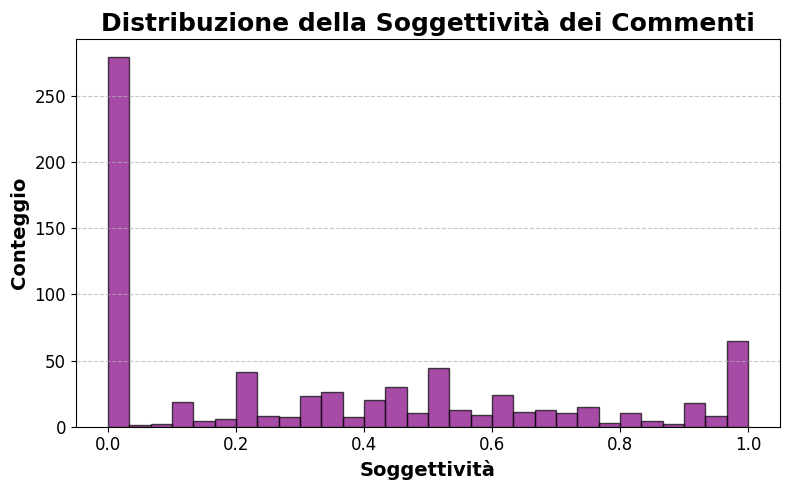

In [ ]:
# Visualizza la distribuzione della soggettività
plt.figure(figsize=(8, 5))
plt.hist(df_new['Subjectivity'], bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title("Distribuzione della Soggettività dei Commenti", fontsize=18, fontweight='bold')
plt.xlabel("Soggettività", fontsize=14, fontweight='bold')
plt.ylabel("Conteggio", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

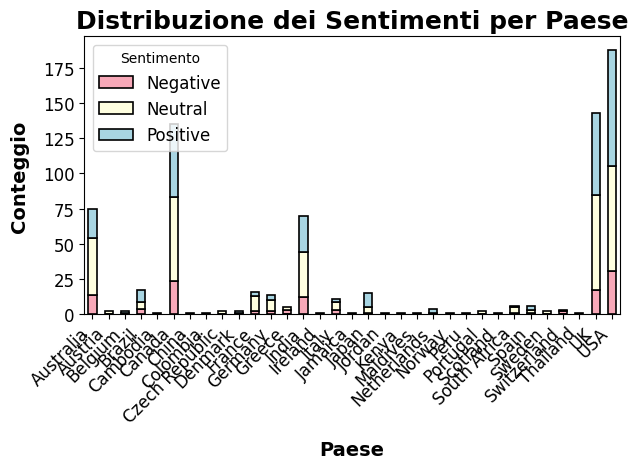

In [ ]:
# Raggruppa i dati per paese e sentimento, e conta quante volte ogni combinazione si presenta
country_sentiment_counts = df_new.groupby(['Country', 'Sentiment_Predicted_TextBlob']).size().unstack(fill_value=0)

# Visualizza la distribuzione dei sentimenti per paese in un grafico a barre
plt.figure(figsize=(20, 8))
country_sentiment_counts.plot(kind='bar', stacked=True, color=['#f7a8b8', '#FFFFE0', '#a8d5e2'], edgecolor='black', linewidth=1.2)
plt.title("Distribuzione dei Sentimenti per Paese", fontsize=18, fontweight='bold')
plt.xlabel("Paese", fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel("Conteggio", fontsize=14, fontweight='bold', labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Sentimento", loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

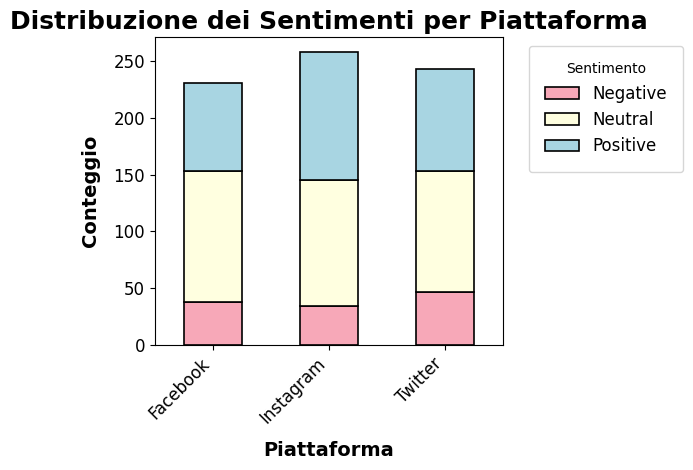

In [ ]:
# Raggruppa i dati per piattaforma e sentimento, e conta quante volte ogni combinazione si presenta
platform_sentiment_counts = df_new.groupby(['Platform', 'Sentiment_Predicted_TextBlob']).size().unstack(fill_value=0)

# Visualizza la distribuzione dei sentimenti per piattaforma in un grafico a barre
plt.figure(figsize=(20, 8))
platform_sentiment_counts.plot(kind='bar', stacked=True, color=['#f7a8b8', '#FFFFE0', '#a8d5e2'], edgecolor='black', linewidth=1.2)
plt.title("Distribuzione dei Sentimenti per Piattaforma", fontsize=18, fontweight='bold')
plt.xlabel("Piattaforma", fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel("Conteggio", fontsize=14, fontweight='bold', labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Sentimento", loc='upper left', fontsize=12, bbox_to_anchor=(1.05, 1), borderpad=1)
plt.tight_layout()

# Visualizza il grafico
plt.show()

#### Key-Phrase extraction

In [8]:
!pip install textacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.4 MB/s eta 0:00:00


In [17]:
import spacy
import textacy.extract
from textacy.extract import keyterms

# Spacy model
en = textacy.load_spacy_lang("en_core_web_sm")

mytext = df_new['cleaned_text']

# Convertiamo il testo in documento Spacy
all_text = " ".join(df_new['cleaned_text'])
doc = textacy.make_spacy_doc(all_text, lang=en)

# Otteniamo i primi 5 termini chiave usando TextRank
key_terms = textacy.extract.keyterms.textrank(doc, topn=5)
print("Textrank output: ", [kps for kps, weights in key_terms])

# Aggregghiamo i termini simili
terms = set([term for term, weight in key_terms])
aggregated_terms = textacy.extract.aggregate_term_variants(terms)
print("Aggregated Terms: ", aggregated_terms)

Textrank output:  ['milestone reverence beauty historic landmark elation surprise reunion old friend euphoria live music concert star contentment simplicity quiet sunday serenity', 'trail brilliance celebration success firework accomplishment light night sky triumph symphony laughter note key unlocking door boundless happiness carnival emotion rollercoaster thrill', 'hand frustration loneliness silent companion night echo chamber solitude heart solitary nocturne awestruck breathtaking sunrise mountain', 'air chorus happiness lifts spirit high garden contentment bloom whisper tale inner peace joy', 'life mystery starry night sky joyful reunion longlost friend year separation excitement']
Aggregated Terms:  [{'trail brilliance celebration success firework accomplishment light night sky triumph symphony laughter note key unlocking door boundless happiness carnival emotion rollercoaster thrill'}, {'milestone reverence beauty historic landmark elation surprise reunion old friend euphoria li